<a href="https://colab.research.google.com/github/mujahidrj/Artificial-Intelligence/blob/master/HW3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
np.random.seed(50)

# Question 1

Problem 1

Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

Normal distribution
Uniform distribution
You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters mu and sigma in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.

In [0]:
def get_random_data(w, b, mu, sigma, m):
  array_of_data = np.empty((m, 2))

  # Set first column of data (x_1) to uniform distribution between 0 and 1
  array_of_data[:,0] = np.random.uniform(size = m)
  
  # Get array of random, uniformly distributed 0 and 1 values for c
  c = np.random.uniform(size = m)
  c = [1. if x < 0.5 else 0. for x in c]

  # Use entries of c as labels
  labels = np.array(c)

  # Generate m amount of noise values
  label_noise = np.random.normal(mu, sigma, m)

  # Set second column of data (x_2) based on parameters given, with noise added
  array_of_data[:,1] = w * array_of_data[:,0] + b + np.power(-1., c) * label_noise
  
  return array_of_data, labels

In [0]:
def display_random_data(array_of_data, labels):
  
  # Use scatter plot to show data points that are separated by points 
  # above the line and below
  plt.scatter(array_of_data[labels==0][:,0], array_of_data[labels==0][:,1], c='blue')
  plt.scatter(array_of_data[labels==1][:,0], array_of_data[labels==1][:,1], c='red')

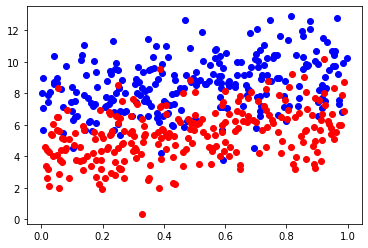

In [4]:
# Using a very small value for mu

w = 2
b = 6
mu = 1.5
sigma = 1.5
m = 500

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

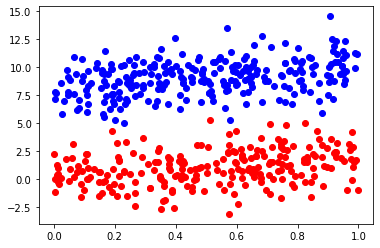

In [5]:
# Using a larger value for mu

w = 2
b = 4
mu = 4
sigma = 1.5
m = 500

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

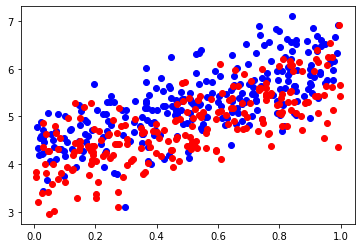

In [6]:
# Using a smaller value for sigma

w = 2
b = 4
mu = 0.25
sigma = 0.5
m = 500

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

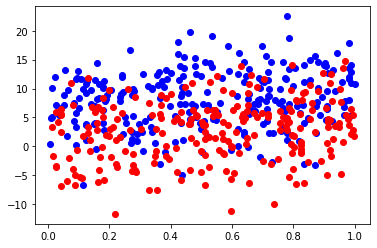

In [7]:
# Using a larger value for sigma

w = 2
b = 4
mu = 2.5
sigma = 5
m = 500

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

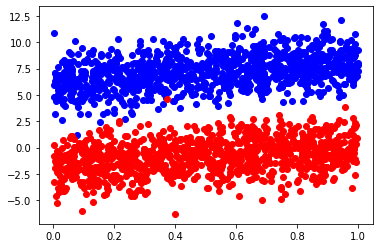

In [8]:
actual_w = 2.0
actual_b = 2.2
small_m_data, small_m_labels = get_random_data(actual_w, actual_b, 4, 1.5,
                                               2000)
display_random_data(small_m_data, small_m_labels)

In [0]:
# Get number of elements in the training set
size_of_training = int(0.8 * labels.shape[0])
size_of_test = int(0.2 * labels.shape[0])
# Split all the data and labels in to a training set and a test set
train_data = data[:size_of_training]
test_data = data[size_of_training:]
train_labels = labels[:size_of_training]
test_labels = labels[size_of_training:]

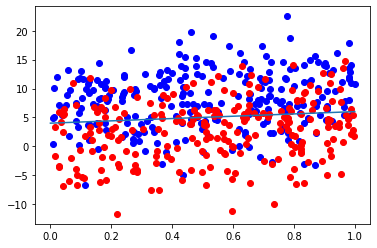

In [10]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b])


# Question 2

In [11]:
# Create the model with all the correct layers
# model = models.Sequential()
# model.add(layers.Dense(1, activation='sigmoid', input_shape=(2,)))
# model.compile(optimizer='rmsprop', loss='binary_crossentropy',
#               metrics=['accuracy'])
model = models.Sequential()
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
model.add(dense_layer)
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model and then evaulate it
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['accuracy'], loss='binary_crossentropy')
model.fit(train_data, train_labels, epochs=100, batch_size=8)
results = model.evaluate(test_data, test_labels)

Epoch 1/100
50/50 [==============================] - 0s 930us/step - loss: 4.4952 - accuracy: 0.3425
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 4.2503 - accuracy: 0.3425
Epoch 3/100
50/50 [==============================] - 0s 858us/step - loss: 4.0086 - accuracy: 0.3425
Epoch 4/100
50/50 [==============================] - 0s 867us/step - loss: 3.7737 - accuracy: 0.3400
Epoch 5/100
50/50 [==============================] - 0s 987us/step - loss: 3.5440 - accuracy: 0.3375
Epoch 6/100
50/50 [==============================] - 0s 953us/step - loss: 3.3154 - accuracy: 0.3400
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 3.0830 - accuracy: 0.3475
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 2.8623 - accuracy: 0.3475
Epoch 9/100
50/50 [==============================] - 0s 975us/step - loss: 2.6385 - accuracy: 0.3475
Epoch 10/100
50/50 [==============================] - 0s 984us/step - loss: 2.4210 - accuracy: 0.

The following is a heatmap of the function $f = \mathbb{R}^2 \rightarrow \mathbb{R}$ from the trained model

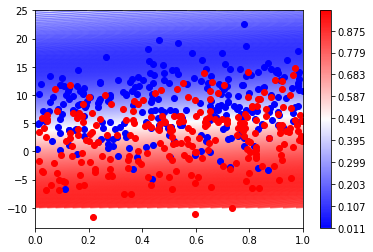

In [12]:
display_random_data(data, labels)
x = np.linspace(0, 1)
y = np.linspace(-10,25)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
plt.tricontour(X, Y, Z, 1000, cmap='bwr', alpha=0.5, zorder=-1)
plt.colorbar();

In [13]:
# weights = model.dense_layer.get_weights()
weights = model.get_weights()
w_1 = weights[0][0][0]
w_2 = weights[0][1][0]
print(weights)
print(w_1)
print(w_2)
bias = weights[1][0] 
weight_line = -w_1 / w_2
bias_line = -bias / w_2 

[array([[ 0.5653466 ],
       [-0.20422725]], dtype=float32), array([0.6662788], dtype=float32)]
0.5653466
-0.20422725


The plot below shows the data generated in Problem 1, the actual separating line of the data, and the separating line that was predicted

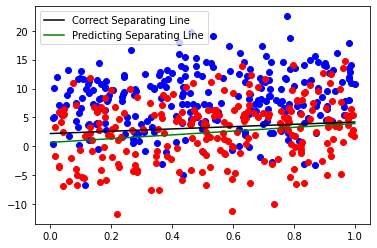

In [14]:
display_random_data(data, labels)
x_1 = np.linspace(0.0, 1.0)
x_2_actual = x_1 * actual_w + actual_b 
x_2_pred = x_1 * bias_line + bias
plt.plot(x_1, x_2_actual, color='black', label='Correct Separating Line');
plt.plot(x_1, x_2_pred, '-k', color='green', label='Predicting Separating Line');
plt.legend();

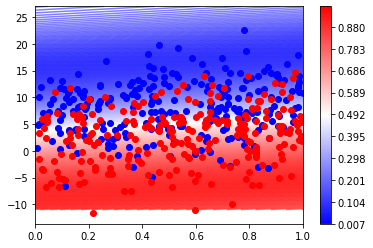

In [15]:
display_random_data(data, labels)
x = np.linspace(0, 1)
y = np.linspace(-11,27)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
#plt.tricontourf(X, Y, Z, 50, cmap='RdGy')
plt.tricontour(X, Y, Z, 1000, cmap='bwr', alpha=0.5, zorder=-1)
plt.colorbar();

# Question 3

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

Below is the code to compute the binary crossetntropy loss and accuracy for the formula $\mathcal{L} = -y \log(a) - (1-y) \log(1-a)$ as given in the notes

In [0]:
num_features = 2
numpy_weights = np.ones(num_features+1)
new_training_data = np.hstack((np.ones([size_of_training, 1]), train_data))


def sigmoid(w, X):
    z = X.dot(w)
    return (1.0/(1 + np.exp(-z)))

# Calculating the gradient
def gradient(w, X, y):
    a = sigmoid(w, X)
    return (a - y).T.dot(X)

# Binary Crossentropy loss 
def bce_loss(w, X, y):
    prediction = sigmoid(w, X)
    return -y * np.log(prediction) - (1 - y) * np.log(1 - prediction)

def train_weights(X, y, w, lr, epochs):
    for i in range(epochs):
        cost = bce_loss(w, X, y)
        w = w - lr * gradient(w, X, y)
    return w

weights = train_weights(new_training_data, train_labels, numpy_weights, lr=0.001, epochs=100)

In [17]:
print(weights)

b_0 = weights[0]
w_1 = weights[1]
w_2 = weights[2]

slope = -(w_1/w_2)
y_int = -(b_0/w_2)

y_0 = slope*(0) + y_int
y_1 = slope*(1) + y_int

[ 0.93997819  1.17993636 -1.16161208]


In [0]:
tf.keras.backend.set_floatx('float64')

x = np.linspace(0, 1)
y = np.linspace(-2, 6)

z = np.ones([50, 50])


for i in range(50):
    for j in range(50):
        z[j][i] = sigmoid(weights, np.array([1, x[i], y[j]]))

In [19]:
new_test_data = np.hstack((np.ones([size_of_test, 1]), test_data))
bce_losses = bce_loss(weights, new_test_data, test_labels)
avg_bce = sum(bce_losses) / len(bce_losses)
print(avg_bce)

1.912436192604877


In [20]:
test_predictions = sigmoid(weights, new_test_data)

for i in range(len(test_predictions)):
    if (test_predictions[i] >= 0.5):
        test_predictions[i] = 1
    else:
        test_predictions[i] = 0

correct = 0

for i in range(len(test_predictions)):
    if (test_predictions[i] == test_labels[i]):
        correct += 1

accuracy = correct / size_of_test
print(accuracy)

0.63


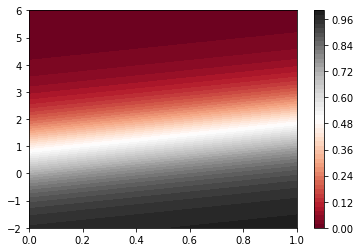

In [21]:
plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()

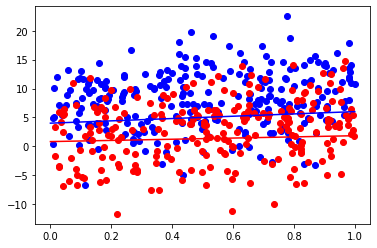

In [22]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b], 'b', label='Actual Line')
plt.plot([0, 1], [y_int, slope+y_int], 'r', label='Boudary')

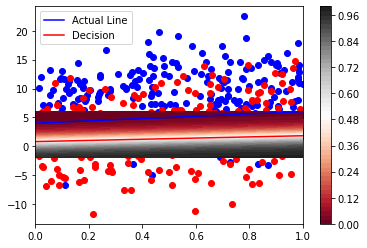

In [23]:
display_random_data(data, labels)
plt.plot([0, 1], [b, w+b], 'b', label='Actual Line')
plt.plot([0, 1], [y_int, slope+y_int], 'r', label='Decision')

plt.contourf(x, y, z, 50, cmap='RdGy')
plt.colorbar()
plt.legend()